In [1]:
import numpy as np                     # Llibreria matemÃ tica
import matplotlib.pyplot as plt        # Per mostrar plots
import sklearn                         # Llibreia de DM
import sklearn.datasets as ds            # Per carregar mÃ©s facilment el dataset digits
import sklearn.model_selection as cv    # Pel Cross-validation
import sklearn.neighbors as nb           # Per fer servir el knn

import pandas



# Read the data and preprocessing

#na_values = ["unknown", "Not known", ""]  # List of values to be treated as NA/NaN
#data = pandas.read_csv('trainingSetValues.csv', sep=',', na_values=na_values)

na_values = ['?'] 
data = pandas.read_csv('allUsers.lcl.csv', na_values=na_values)

# Calculate the percentage of missing values for each feature
missing_percentages = data.isnull().sum() / len(data) * 100

# Identify features with more than 50% missing values
features_to_remove = missing_percentages[missing_percentages > 50].index

# Remove features with more than 50% missing values
data = data.drop(features_to_remove, axis=1)

#data = data.replace('?', 0)
data = data.fillna('0')


print("Remaining Features:")
print(data.columns)
print("Missing Value Percentages:")
print(data.isnull().sum() / len(data) * 100)

data.describe(include='all')

Remaining Features:
Index(['Class', 'User', 'X0', 'Y0', 'Z0', 'X1', 'Y1', 'Z1', 'X2', 'Y2', 'Z2',
       'X3', 'Y3', 'Z3', 'X4', 'Y4', 'Z4', 'X5', 'Y5', 'Z5', 'X6', 'Y6', 'Z6'],
      dtype='object')
Missing Value Percentages:
Class    0.0
User     0.0
X0       0.0
Y0       0.0
Z0       0.0
X1       0.0
Y1       0.0
Z1       0.0
X2       0.0
Y2       0.0
Z2       0.0
X3       0.0
Y3       0.0
Z3       0.0
X4       0.0
Y4       0.0
Z4       0.0
X5       0.0
Y5       0.0
Z5       0.0
X6       0.0
Y6       0.0
Z6       0.0
dtype: float64


,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z3,X4,Y4,Z4,X5,Y5,Z5,X6,Y6,Z6
count,78096.000000,78096.000000,78096.000000,78096.000000,78096.000000,78096.000000,78096.000000,78096.000000,78096.000000,78096.000000,...,78096,78096,78096,78096,78096,78096,78096,78096,78096,78096
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,77405,74974,74974,74975,65074,65072,65074,52247,52246,52247
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690,3120,3120,3120,13023,13023,13023,25848,25848,25848
mean,2.983738,7.959127,50.345664,85.812051,-29.984712,49.595209,86.192647,-29.509202,48.612121,83.771315,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.421183,4.697810,32.696173,40.204363,34.361918,32.478238,40.453214,34.764398,33.605390,41.023543,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000,-108.552738,-98.233756,-126.770872,-111.685241,-96.142589,-166.006838,-106.886524,-100.789312,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.000000,5.000000,29.295062,63.494432,-56.356438,28.755137,64.154529,-57.360107,25.170006,58.052385,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3.000000,9.000000,54.619964,86.526246,-30.864125,54.215514,87.542751,-30.184005,53.814580,86.458324,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,4.000000,12.000000,72.488686,113.107355,-1.418803,71.762039,116.219398,-0.366692,71.561951,106.660827,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
X = data.drop(['User'], axis=1)
y = data['User']
(X_train, X_test,  y_train, y_test) = cv.train_test_split(X, y, test_size=0.20, random_state=42)



<b>Default DecisionTreeClassifier of sklearn<b>
    

In [3]:


from sklearn import tree
from sklearn.metrics import confusion_matrix
from statsmodels.stats.proportion import proportion_confint


clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)

# Obtain accuracy score of learned classifier on test data
print(clf.score(X_test, y_test))
print(confusion_matrix(y_test, pred))
print()
print("Accuracy:", sklearn.metrics.accuracy_score(y_test, pred))
print()
print(sklearn.metrics.classification_report(y_test, pred))

#epsilon = sklearn.metrics.accuracy_score(y_test, pred)
#proportion_confint(count=epsilon*X_test.shape[0], nobs=X_test.shape[0], alpha=0.05, method='binom_test')



0.9308578745198464
[[1664   12    5    7    8   15    3   30    1   13    2    7   16   11]
 [  16  842    1    4    4    9    5    9    4    4   11    2   20    7]
 [  10    8  810    0    3    1    2    1    2    6    9    3    1    6]
 [   8    5    0   40    1    1    3    4    0    7    3    4    3    2]
 [   4    5    1    0  942    0    0    0    2    1    6    2   12   14]
 [  14    2    2    1    2  839    0   17    4    1    5    1    2    2]
 [   7    3    3    5    0    3   48    1    6    4    5    1    4    2]
 [  45   12    7    4    2   26    2 1230    1   51    3    5    3    6]
 [   0    9    1    1    0    4    5    0  723    1   12    2    5    8]
 [  18    0    9    2    2    2    2   41    3 1833    6    5    0    2]
 [  12   11    3    0    8    3    2    5   16    3 1584    3   10   17]
 [   7    3    3    5    4    1    6    7    0    2    2  942    4    3]
 [   6    8    4    3    7    3    3    1    6    6    5    3 1649   25]
 [   3    7    1    2   14    1 

0.9183098591549296
[[1615   24   14    2    3   18    2   47    5   13   13    7   11   20]
 [  26  815    5    3    7    8    6   11   10    7   20    1   14    5]
 [   4    5  812    4    1    4    1    5    0    7    9    4    4    2]
 [   7    7    3   34    0    1    5    6    0    7    1    1    7    2]
 [   5    4    2    0  925    2    2    2    2    3    9    1   17   15]
 [  18    6    7    5    2  793    1   25    3    9   10    4    6    3]
 [   3    4    2    3    0    2   48    0    6    7    9    1    4    3]
 [  37   18    7    3    5   27    0 1245    0   39    4    6    2    4]
 [   5   12    2    0    4    7    5    3  713    0    4    1    4   11]
 [   6    3    2    4    2    8    2   37    2 1841    7    2    4    5]
 [  12    9   11    4   10   12    0    4   13    3 1565    5   14   15]
 [   6    6    3    5    2    1    3    8    0    4    2  921   12   16]
 [  15   12    1    3    7    4    4    4   10    2    9    5 1640   13]
 [   7   14    4    6   16    4 

<Figure size 80000x8000 with 0 Axes>

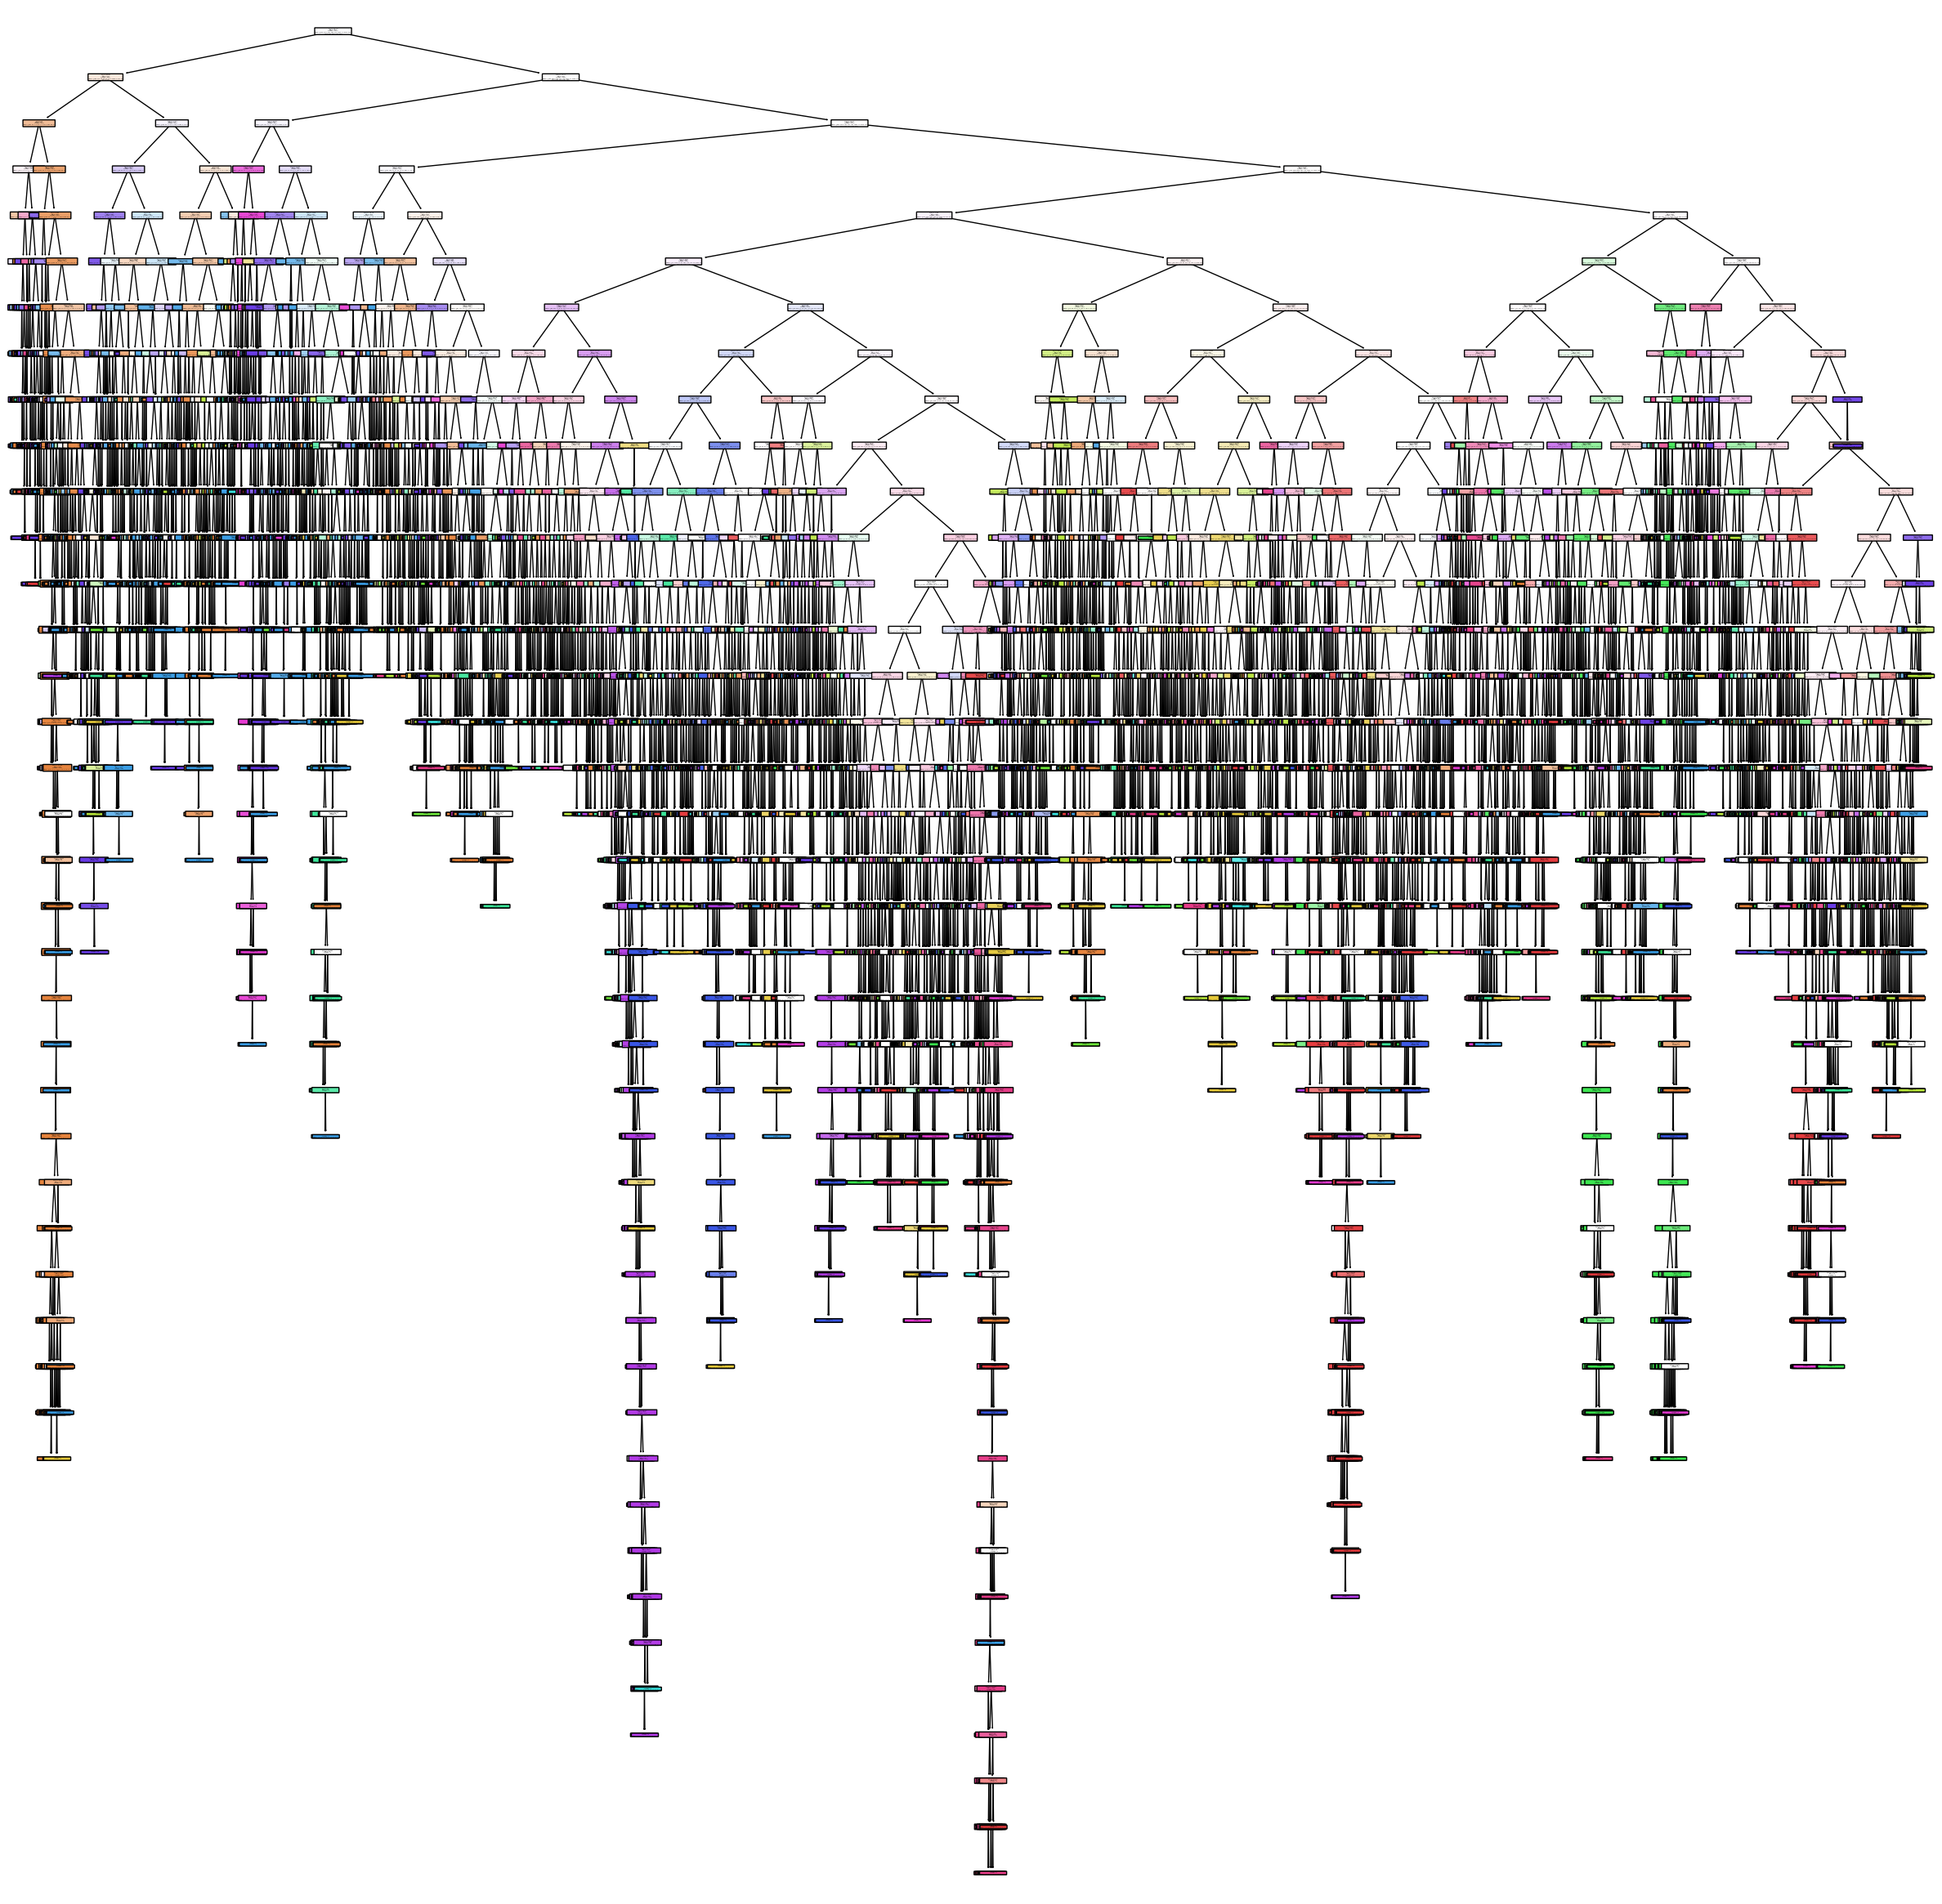

In [4]:
# plot defaul version of decision tree
clf=tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)

# Obtain accuracy score of learned classifier on test data
print(clf.score(X_test, y_test))
print(confusion_matrix(y_test, pred))
print()
print("Accuracy:", sklearn.metrics.accuracy_score(y_test, pred))
print()
print(sklearn.metrics.classification_report(y_test, pred))
epsilon = sklearn.metrics.accuracy_score(y_test, pred)
#print("Interval of confidence:", proportion_confint(count=epsilon*X_test.shape[0], nobs=X_test.shape[0], alpha=0.05, method='binom_test'))

fig = plt.gcf()
fig.set_size_inches(800, 80)

#tree.plot_tree(clf, filled=True,rounded=True)
#fig.savefig('tree.png')
#plt.show()

fig, ax = plt.subplots(figsize=(30, 30))
tree.plot_tree(clf, filled=True, rounded=True, ax=ax)
plt.show()

In [5]:
num_nodes = clf.tree_.node_count
print("Number of nodes in the decision tree:", num_nodes)

num_leaves = clf.tree_.n_leaves
print("Number of leaves in the decision tree:", num_leaves)

Number of nodes in the decision tree: 8593
Number of leaves in the decision tree: 4297


0.3963508322663252
[[748  81 227   0  35   0   0 260   2 196  32  92  67  54]
 [ 30 373  15   0  93   0   0  36  49  14  41  41 147  99]
 [  5  61 367   0  36   0   0 162   4  12   0  34  39 142]
 [ 14  18  12   0   0   0   0  12   1   3   1   6  10   4]
 [ 19  36   0   0 619   0   0   0   0   0  12  76 109 118]
 [ 11   1  98   0  82   0   0 256 177  29  46   0 105  87]
 [  4  16   5   0   1   0   0   4  12   1  19   2  20   8]
 [ 81   3 142   0  51   0   0 477   6 456   1  27  50 103]
 [  6   4   0   0  55   0   0   0 428   0   4   0 245  29]
 [285   1  87   0  26   0   0 263  26 800   1  91 140 205]
 [189  42  15   0 281   0   0   9  14   0 553   0 246 328]
 [ 89  81   0   0  15   0   0  22   0   2  54 517 152  57]
 [199 150   8   0 284   0   0   8   0   0 151   0 640 289]
 [ 21 293   1   0 203   0   0   5  56   0   1   0 235 669]]

Accuracy: 0.3963508322663252

              precision    recall  f1-score   support

           0       0.44      0.42      0.43      1794
           1  

/home/he/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/he/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/he/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 80000x8000 with 0 Axes>

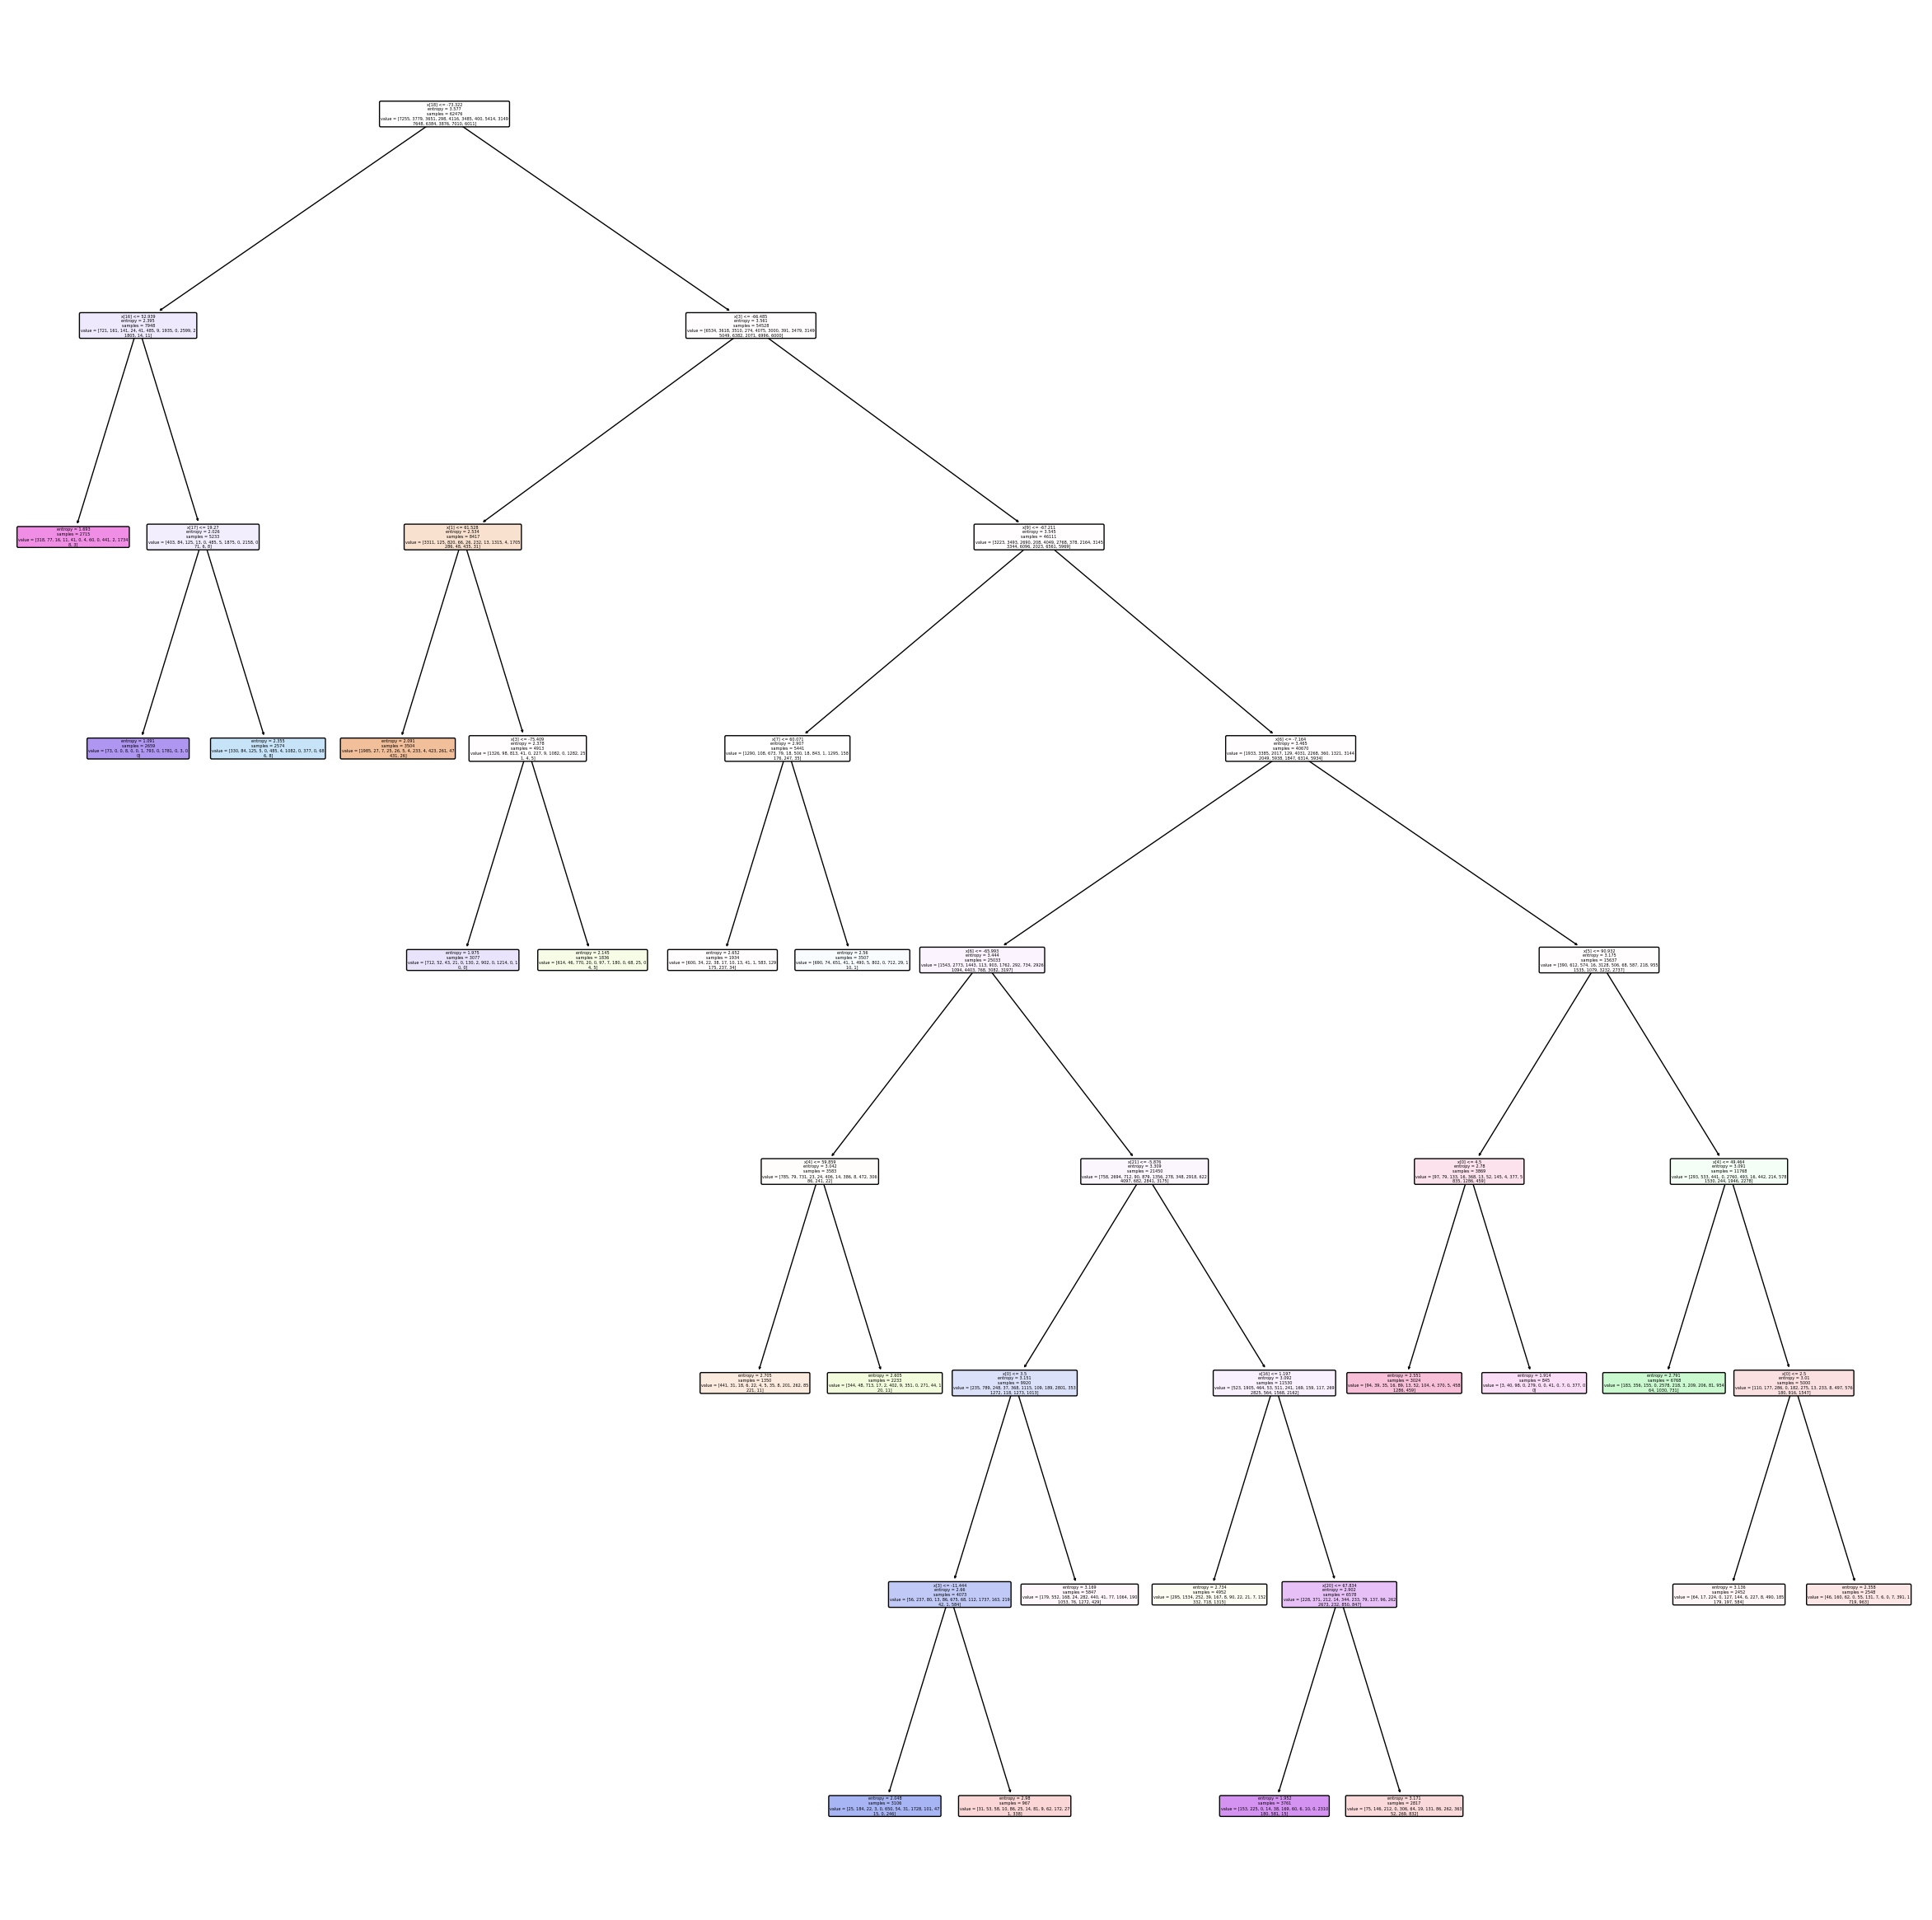

In [6]:
# TEST CODE TO CHECK TREE WITH DIFFERENT PARAM
clf=tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=2,min_impurity_decrease=0.02)
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)

# Obtain accuracy score of learned classifier on test data
print(clf.score(X_test, y_test))
print(confusion_matrix(y_test, pred))
print()
print("Accuracy:", sklearn.metrics.accuracy_score(y_test, pred))
print()
print(sklearn.metrics.classification_report(y_test, pred))
epsilon = sklearn.metrics.accuracy_score(y_test, pred)
#print("Interval of confidence:", proportion_confint(count=epsilon*X_test.shape[0], nobs=X_test.shape[0], alpha=0.05, method='binom_test'))

fig = plt.gcf()
fig.set_size_inches(800, 80)

#tree.plot_tree(clf, filled=True,rounded=True)
#fig.savefig('tree.png')
#plt.show()

fig, ax = plt.subplots(figsize=(30, 30))
tree.plot_tree(clf, filled=True, rounded=True, ax=ax)
plt.show()

SEARCHING FOR BEST PARAMETERS: 

In [11]:
# esto puede tardar bastante !!!!!!!!!!!!!!!!!!!!!!!!!!!!
from sklearn.model_selection import GridSearchCV
params = {
    'criterion': ['entropy','gini'],
    #'splitter': ['best','random'],
    'min_impurity_decrease': [0.0, 0.01, 0.02, 0.05],  s                               #list(np.linspace(0,0.5,50)),
    'min_samples_split': [2, 5, 10, 20],                                              # list(range(2,20,5)), 
    'max_depth': [10, 20, 30, 50],
    'max_leaf_nodes': [20, 40, 60, 80, 100]    
    }

clf = GridSearchCV(tree.DecisionTreeClassifier(), param_grid=params,cv=10,n_jobs=-1)

  # If cv is integer, by default is Stratifyed 
clf.fit(X_train, y_train)
print("Best Params=",clf.best_params_, "Accuracy=", clf.best_score_)

Best Params= {'criterion': 'entropy', 'max_depth': 20, 'max_leaf_nodes': 100, 'min_impurity_decrease': 0.0, 'min_samples_split': 2} Accuracy= 0.5960366430432061


0.6029449423815622
[[ 880   49  156    0   12   64    0   66    0  255   80   55  130   47]
 [  20  369   13    0   31   32    0   14   50   82  130   11  106   80]
 [  39   58  479    0   38   89    0   37    8   19   68    9    5   13]
 [  10    7   10    0    0    7    0    4    0    8    7    8   10   10]
 [   6    8   20    0  611    0    0    0   10   24   54   31  140   85]
 [  14   15   48    0    0  365    0   61  155   57   89    0   77   11]
 [  12   15    4    0    0    6    0    0   13   11   10    7   12    2]
 [ 106    4   62    0   16  109    0  639    0  306   55   19   44   37]
 [   0    1    0    0    3   15    0    5  555    3   74    2  105    8]
 [  93    0   27    0    9   33    0   80    8 1493   81   29   54   18]
 [   4   59   19    0   75    8    0   17   73   20 1130    9  169   94]
 [  50   16    0    0    5    0    0    4    1   64   20  759   44   26]
 [   2   64   18    0   66   39    0    8   23   39  133   40 1232   65]
 [   0   30   14    0   99    0 

/home/he/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/he/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/he/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 80000x8000 with 0 Axes>

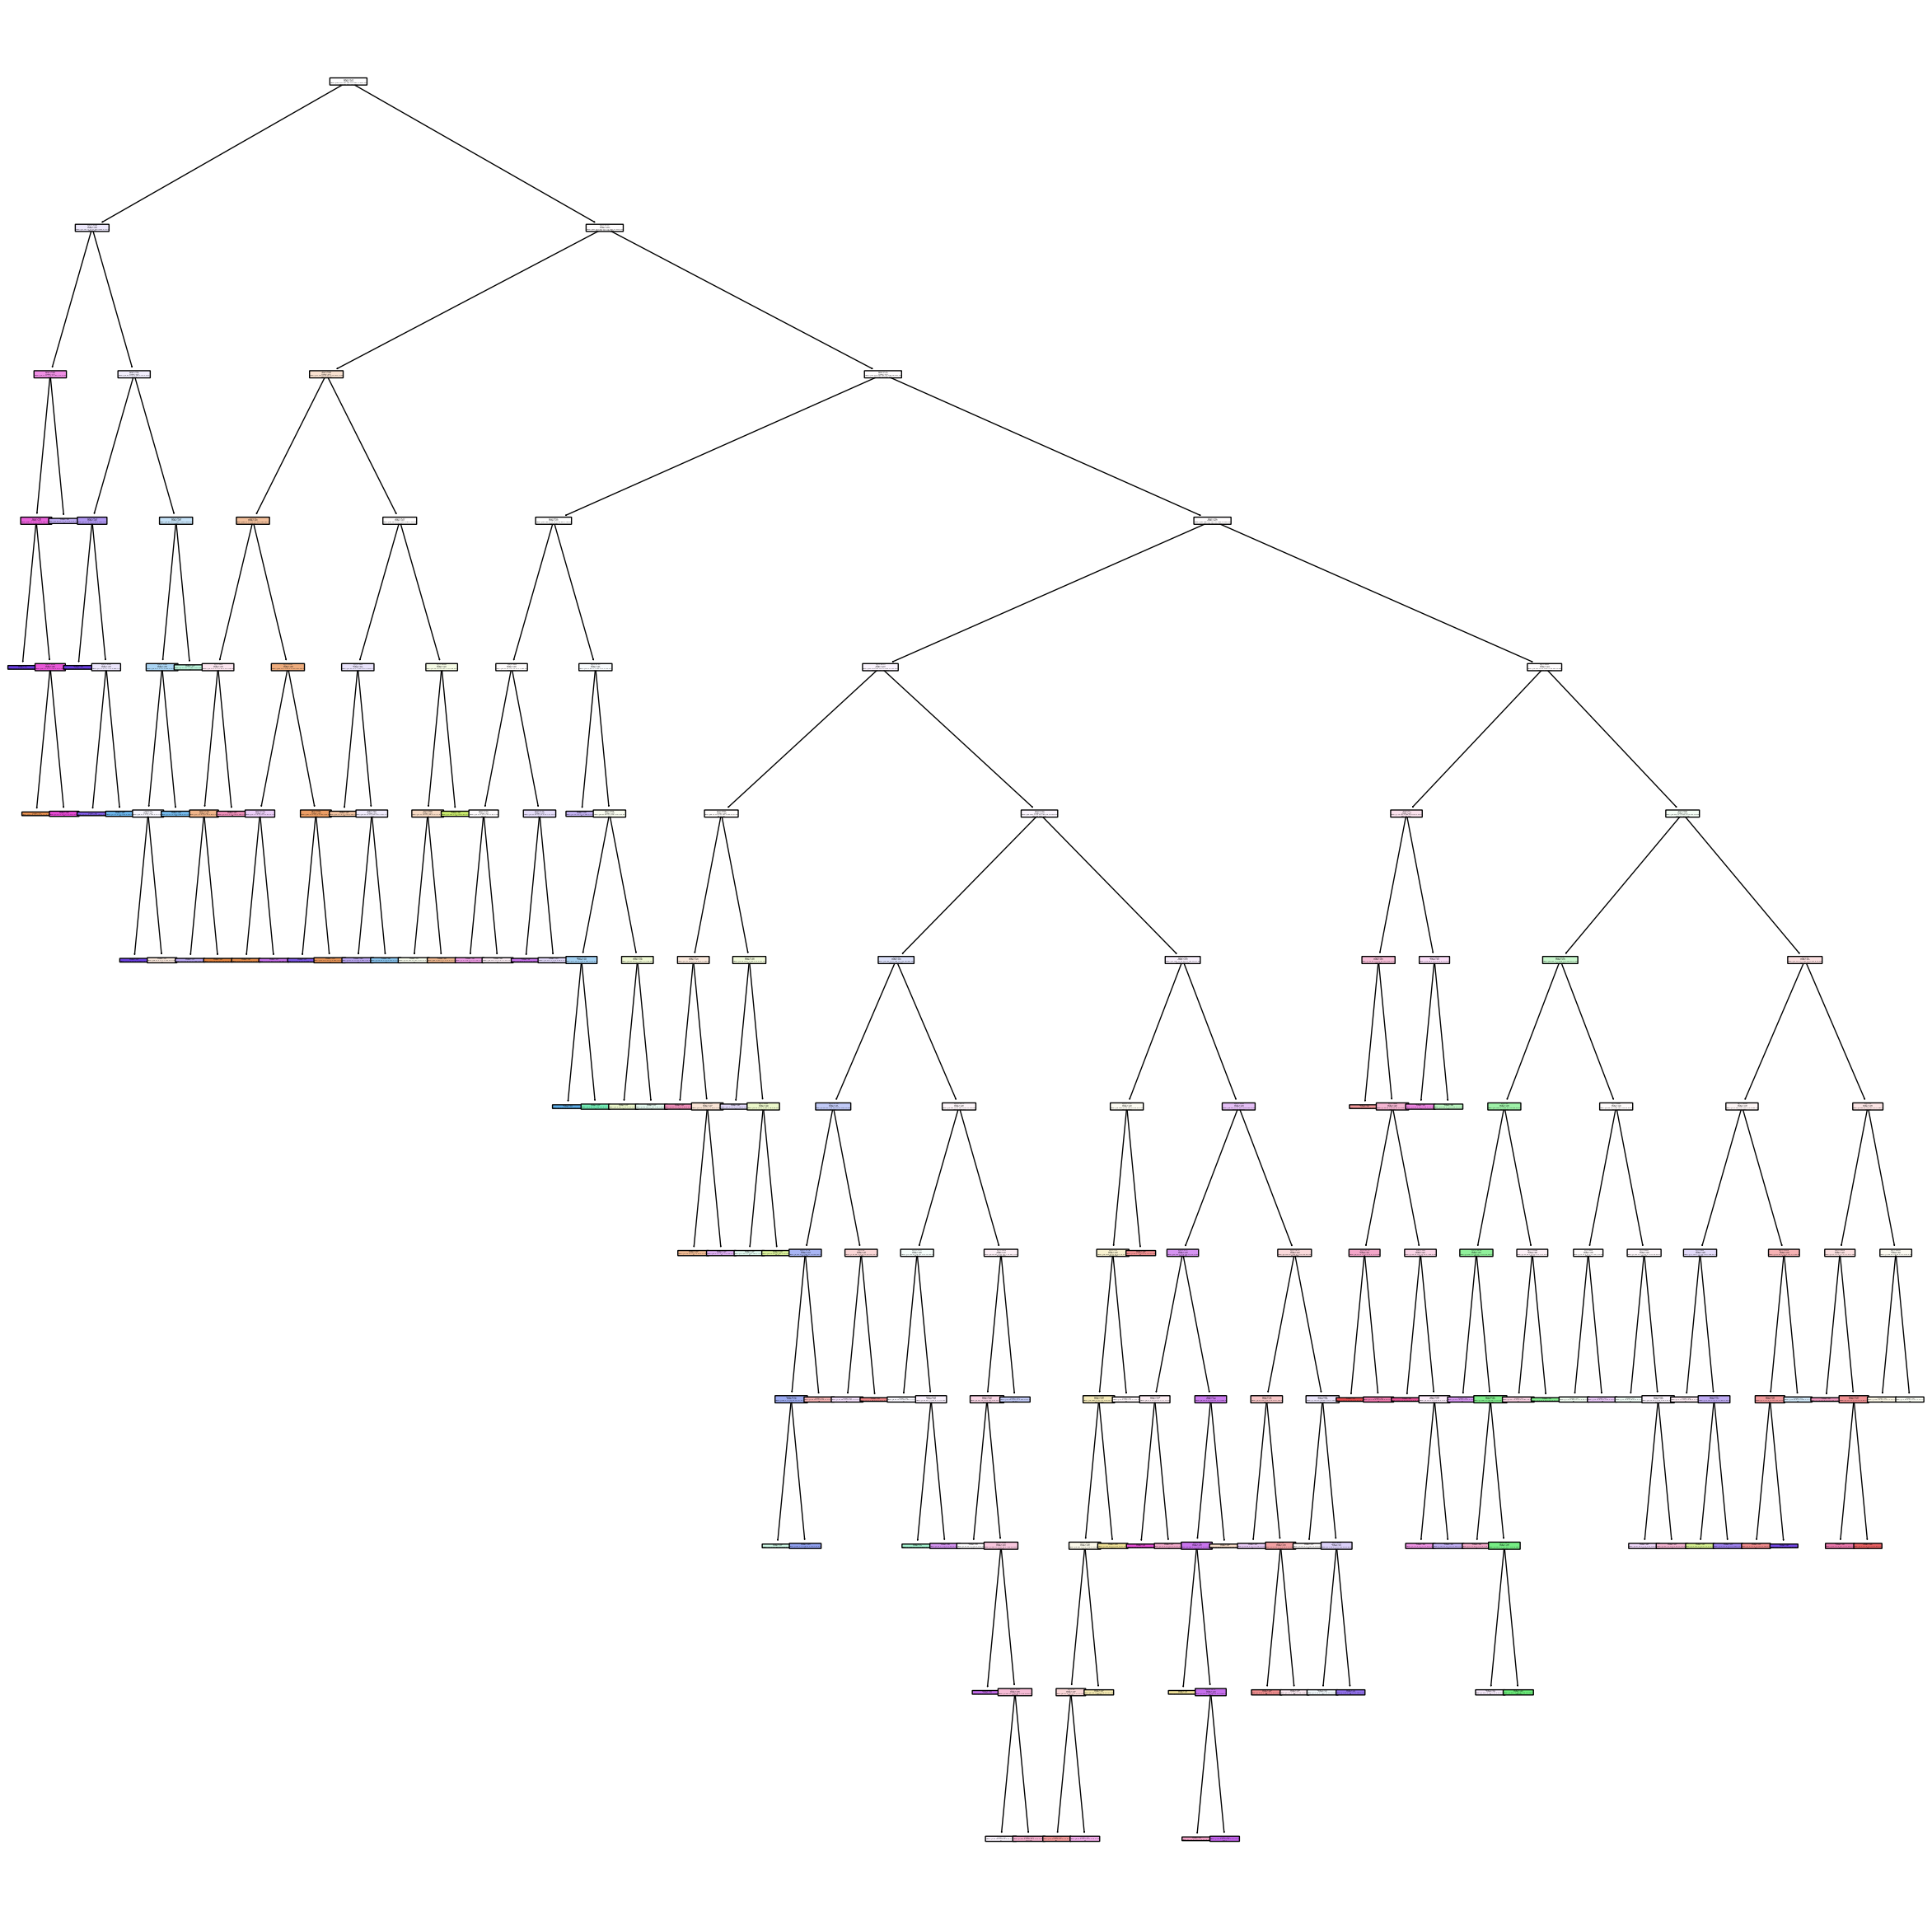

In [12]:

clf=tree.DecisionTreeClassifier(
    criterion='entropy',
    #splitter='best',
    min_samples_split=2,
    min_impurity_decrease=0.0,
    max_depth=20,
    max_leaf_nodes= 100
    #max_leaf_nodes= 30,
    )
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)

# Obtain accuracy score of learned classifier on test data
print(clf.score(X_test, y_test))
print(confusion_matrix(y_test, pred))
print()
print("Accuracy:", sklearn.metrics.accuracy_score(y_test, pred))
print()
print(sklearn.metrics.classification_report(y_test, pred))
epsilon = sklearn.metrics.accuracy_score(y_test, pred)
#print("Interval of confidence:", proportion_confint(count=epsilon*X_test.shape[0], nobs=X_test.shape[0], alpha=0.05, method='binom_test'))


fig = plt.gcf()
fig.set_size_inches(800, 80)

#tree.plot_tree(clf, filled=True,rounded=True)
#fig.savefig('tree.png')
#plt.show()

fig, ax = plt.subplots(figsize=(30, 30))
tree.plot_tree(clf, filled=True, rounded=True, ax=ax)
plt.show()

In [13]:
num_nodes = clf.tree_.node_count
print("Number of nodes in the decision tree:", num_nodes)

num_leaves = clf.tree_.n_leaves
print("Number of leaves in the decision tree:", num_leaves)

Number of nodes in the decision tree: 199
Number of leaves in the decision tree: 100


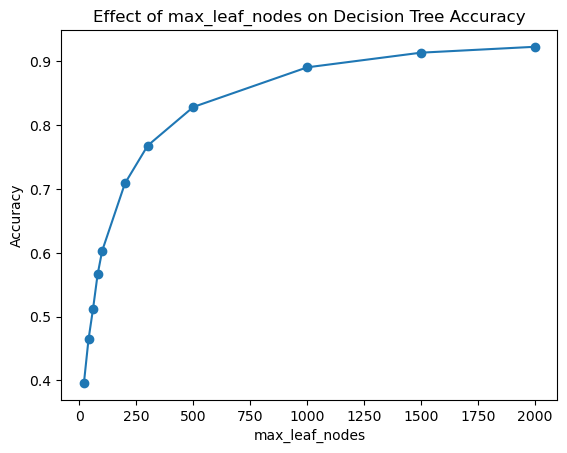

In [17]:
max_leaf_nodes_values = [20, 40, 60, 80, 100, 200, 300, 500, 1000, 1500, 2000]
accuracy_scores = []

for max_leaf_nodes in max_leaf_nodes_values:
    clf = tree.DecisionTreeClassifier(
        criterion='entropy',
        min_samples_split=2,
        min_impurity_decrease=0.0,
        max_depth=None,
        max_leaf_nodes=max_leaf_nodes
    )
    clf = clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    accuracy = sklearn.metrics.accuracy_score(y_test, pred)
    accuracy_scores.append(accuracy)

# Plotting the results
plt.plot(max_leaf_nodes_values, accuracy_scores, marker='o')
plt.xlabel('max_leaf_nodes')
plt.ylabel('Accuracy')
plt.title('Effect of max_leaf_nodes on Decision Tree Accuracy')
plt.show()


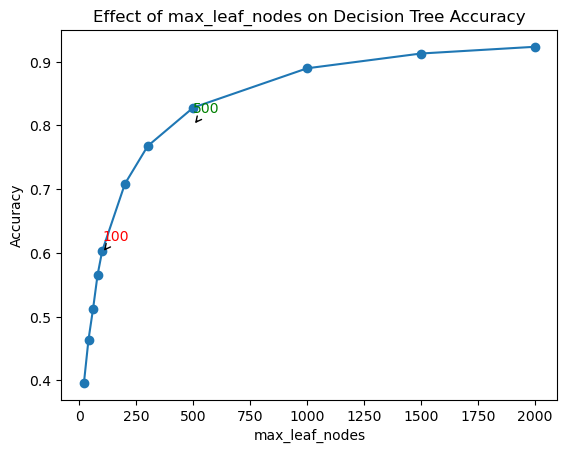

In [19]:
max_leaf_nodes_values = [20, 40, 60, 80, 100, 200, 300, 500, 1000, 1500, 2000]
accuracy_scores = []

for max_leaf_nodes in max_leaf_nodes_values:
    clf = tree.DecisionTreeClassifier(
        criterion='entropy',
        min_samples_split=2,
        min_impurity_decrease=0.0,
        max_depth=None,
        max_leaf_nodes=max_leaf_nodes
    )
    clf = clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    accuracy = sklearn.metrics.accuracy_score(y_test, pred)
    accuracy_scores.append(accuracy)

# Find the max_leaf_nodes value when accuracy is 0.6
target_accuracy_1 = 0.6
max_leaf_nodes_0_6 = max_leaf_nodes_values[accuracy_scores.index(next(x for x in accuracy_scores if x >= target_accuracy_1))]

# Find the max_leaf_nodes value when accuracy is 0.8
target_accuracy_2 = 0.8
max_leaf_nodes_0_8 = max_leaf_nodes_values[accuracy_scores.index(next(x for x in accuracy_scores if x >= target_accuracy_2))]

# Plotting the results with markers for the desired accuracy points
plt.plot(max_leaf_nodes_values, accuracy_scores, marker='o')
plt.annotate(f'{max_leaf_nodes_0_6}', xy=(max_leaf_nodes_0_6, target_accuracy_1), xytext=(max_leaf_nodes_0_6, target_accuracy_1+0.02), color='red', arrowprops=dict(facecolor='red', arrowstyle='->'))
plt.annotate(f'{max_leaf_nodes_0_8}', xy=(max_leaf_nodes_0_8, target_accuracy_2), xytext=(max_leaf_nodes_0_8, target_accuracy_2+0.02), color='green', arrowprops=dict(facecolor='green', arrowstyle='->'))
plt.xlabel('max_leaf_nodes')
plt.ylabel('Accuracy')
plt.title('Effect of max_leaf_nodes on Decision Tree Accuracy')
plt.show()


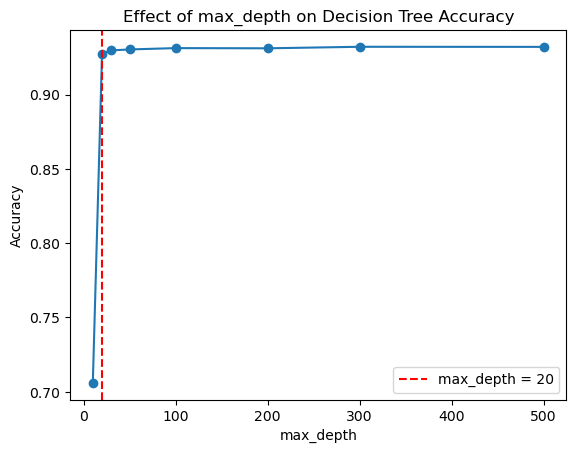

In [20]:
max_depth_values = [10, 20, 30, 50, 100, 200, 300, 500]
accuracy_scores = []

for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(
        criterion='entropy',
        min_samples_split=2,
        min_impurity_decrease=0.0,
        max_depth=max_depth,
        max_leaf_nodes=None
    )
    clf = clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    accuracy = sklearn.metrics.accuracy_score(y_test, pred)
    accuracy_scores.append(accuracy)

# Plotting the results
plt.plot(max_depth_values, accuracy_scores, marker='o')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Effect of max_depth on Decision Tree Accuracy')
plt.axvline(x=20, color='r', linestyle='--', label='max_depth = 20')
plt.legend()
plt.show()


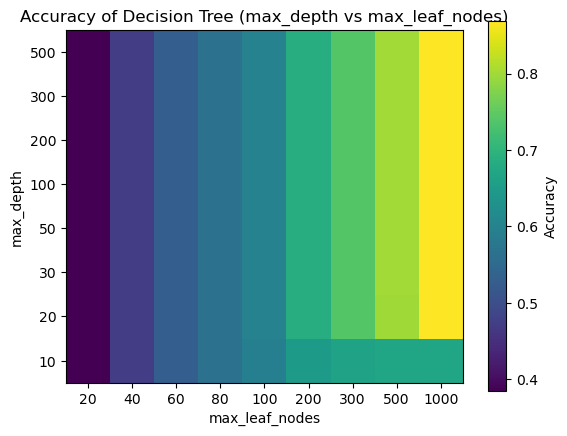

In [10]:
import numpy as np
import matplotlib.pyplot as plt

max_depth_values = [10, 20, 30, 50, 100, 200, 300, 500]
max_leaf_nodes_values = [20, 40, 60, 80, 100, 200, 300, 500, 1000]

accuracy_matrix = np.zeros((len(max_depth_values), len(max_leaf_nodes_values)))

for i, max_depth in enumerate(max_depth_values):
    for j, max_leaf_nodes in enumerate(max_leaf_nodes_values):
        clf = tree.DecisionTreeClassifier(
            criterion='gini',
            min_samples_split=2,
            min_impurity_decrease=0.0,
            max_depth=max_depth,
            max_leaf_nodes=max_leaf_nodes
        )
        clf = clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        accuracy = sklearn.metrics.accuracy_score(y_test, pred)
        accuracy_matrix[i, j] = accuracy

# Plotting the heatmap
plt.imshow(accuracy_matrix, cmap='viridis', origin='lower')
plt.colorbar(label='Accuracy')
plt.xticks(np.arange(len(max_leaf_nodes_values)), max_leaf_nodes_values)
plt.yticks(np.arange(len(max_depth_values)), max_depth_values)
plt.xlabel('max_leaf_nodes')
plt.ylabel('max_depth')
plt.title('Accuracy of Decision Tree (max_depth vs max_leaf_nodes)')
plt.show()



0.7085147247119078
[[1164   36  129    0   16   90    7  123    0   43   39   54   63   30]
 [  47  467   16    0   17   63    0   25   11   13  135   12   79   53]
 [  16   23  632    0   19   35    3   34    4   11   55    2   10   18]
 [  14    6   13    0    0    7    1    6    0    7    6    8    6    7]
 [  10   24   20    0  704    0    0    3    0    8   38   10  102   70]
 [  20   32   32    0    5  565    0   92   13   26   47    1   52    7]
 [  17   22    2    0    1    8    7    2    3    9   10    1    7    3]
 [  85   10   19    0   13   75    0  895    0  207   54   20   11    8]
 [   3   21    0    0   10   44    0    5  506    0   98    1   77    6]
 [  92    6   17    0    7   23   11  125    3 1502   51   21   30   37]
 [  20   26   30    0   26    3    0   18   13    5 1343    3   87  103]
 [  63   21    4    0   11    5    1    2    0   32   10  798   26   16]
 [   4   56   30    0   37    1    7    1    9   10   92   17 1416   49]
 [   3   34   15    0  100    0 

/home/he/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/he/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/he/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 80000x8000 with 0 Axes>

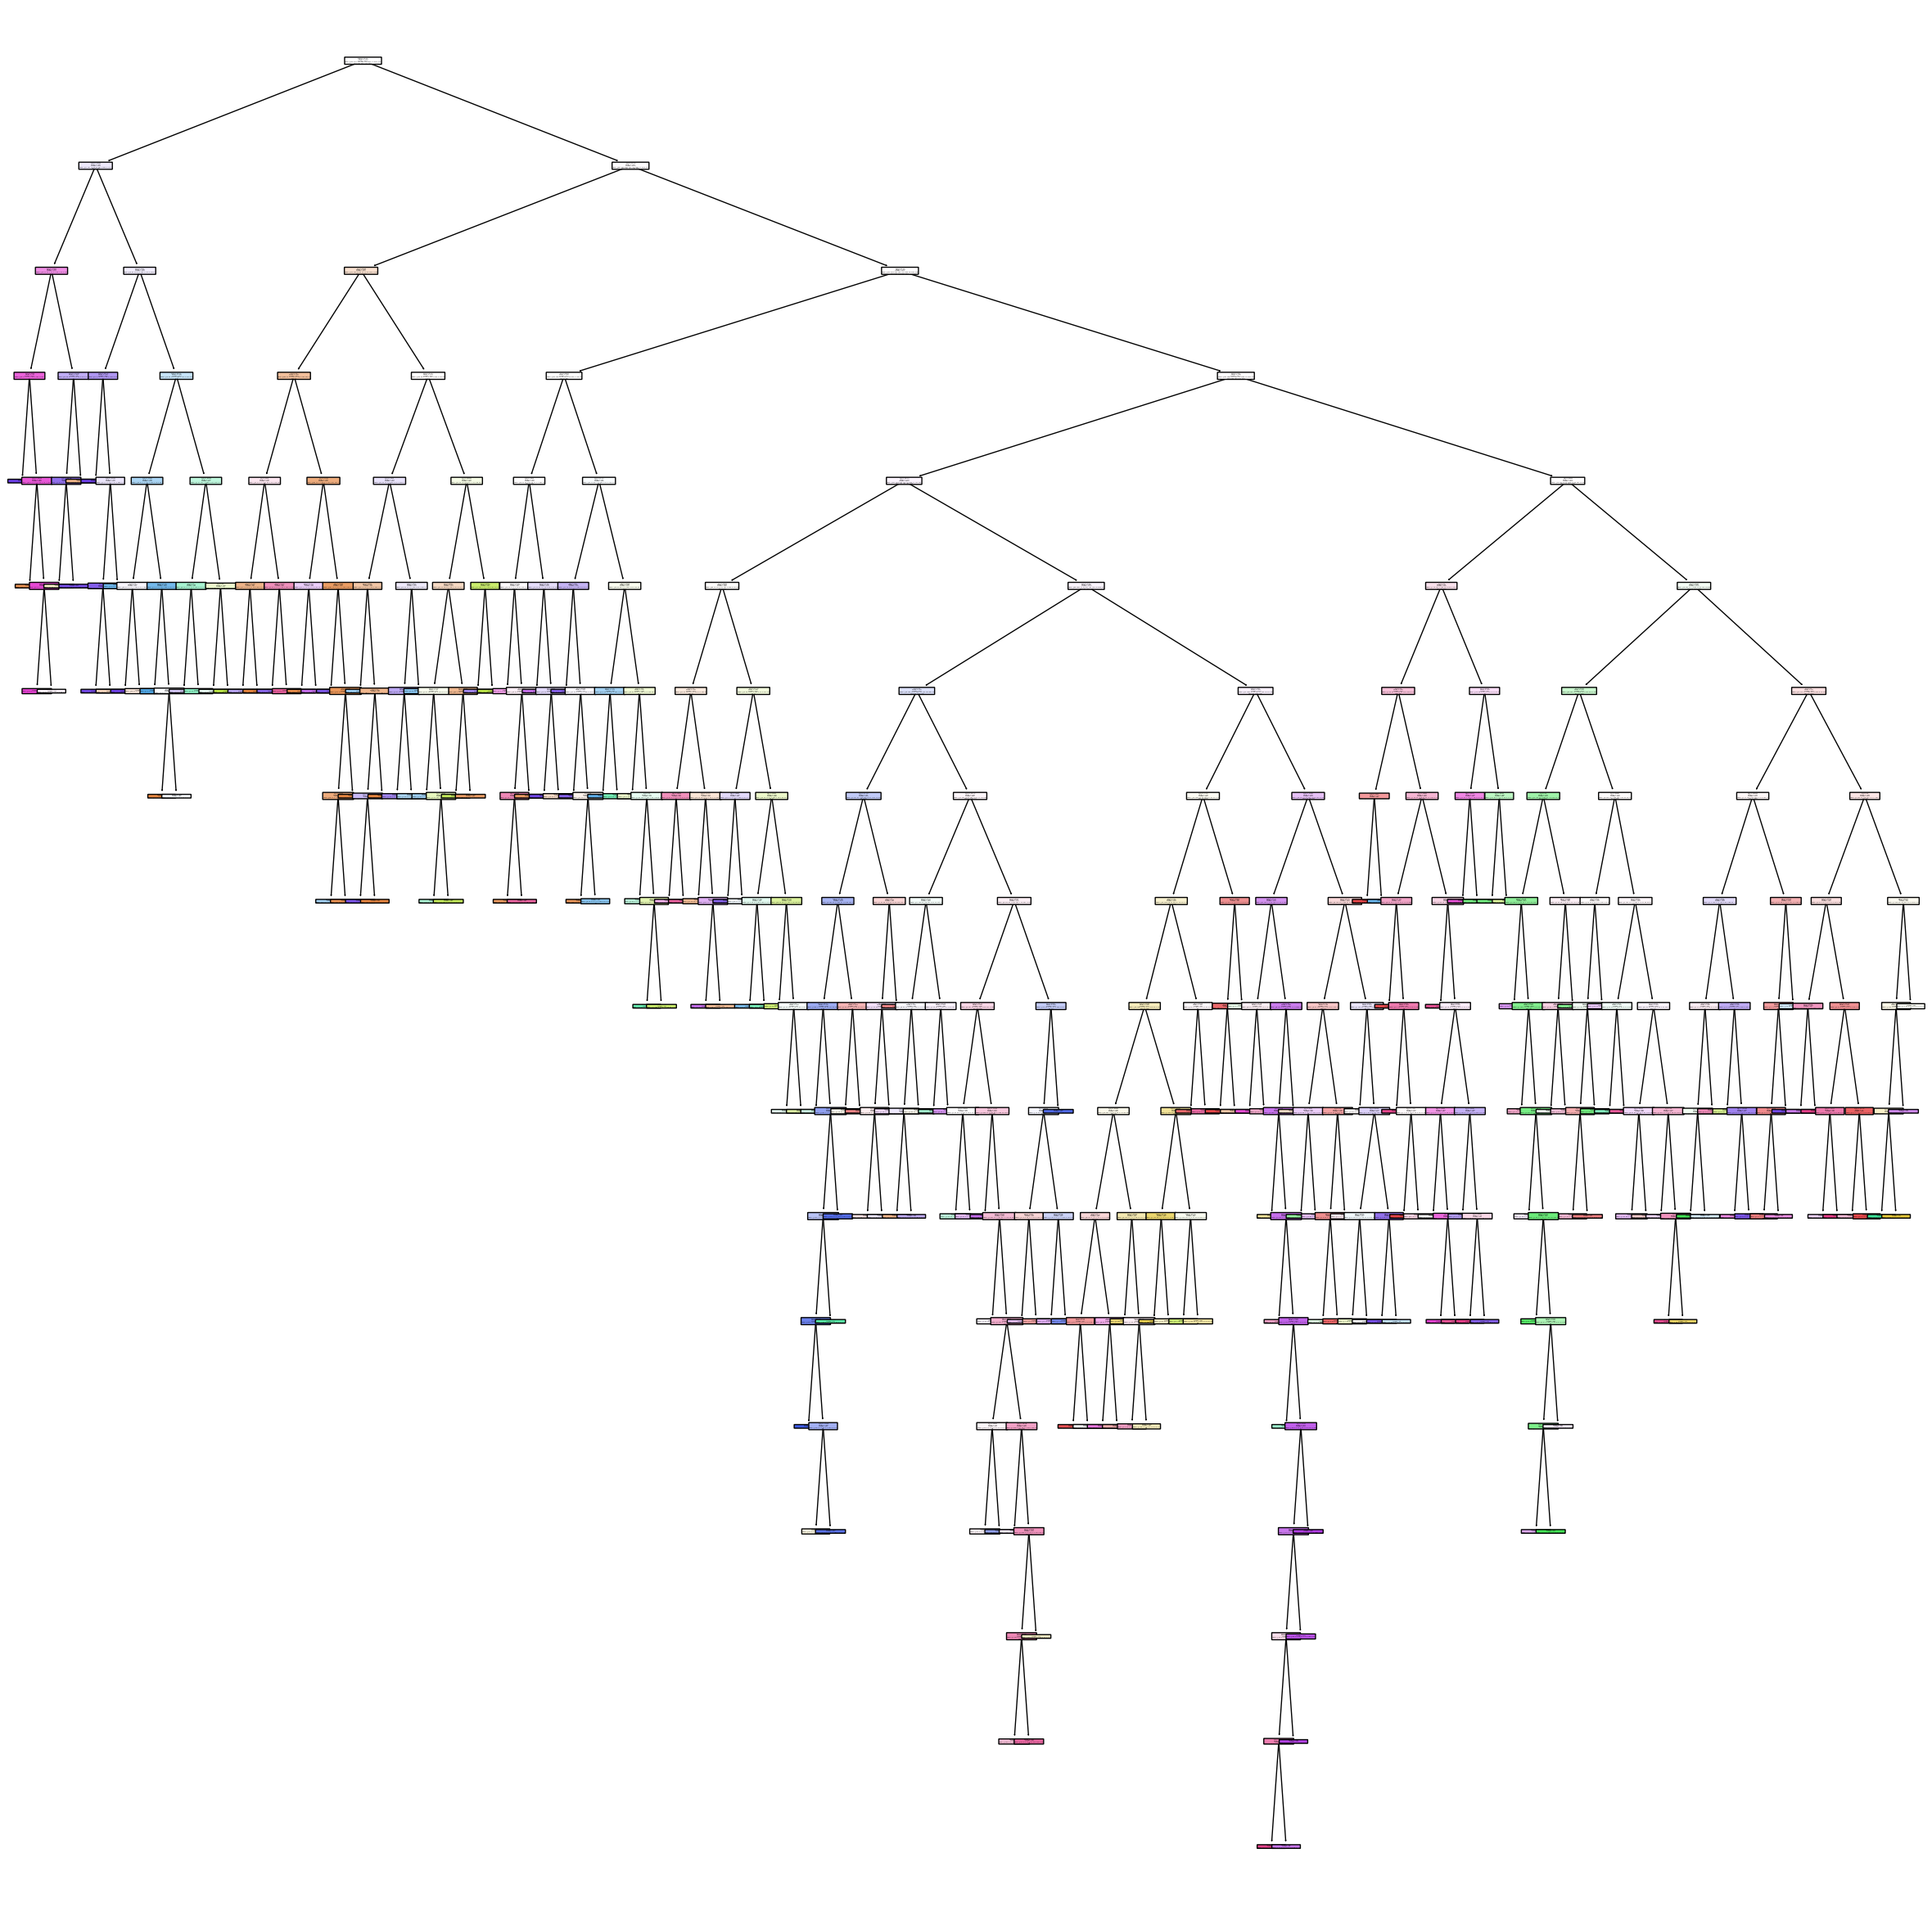

In [21]:

clf=tree.DecisionTreeClassifier(
    criterion='entropy',
    #splitter='best',
    min_samples_split=2,
    min_impurity_decrease=0.0,
    max_depth=20,
    max_leaf_nodes= 200
    #max_leaf_nodes= 30,
    )
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)

# Obtain accuracy score of learned classifier on test data
print(clf.score(X_test, y_test))
print(confusion_matrix(y_test, pred))
print()
print("Accuracy:", sklearn.metrics.accuracy_score(y_test, pred))
print()
print(sklearn.metrics.classification_report(y_test, pred))
epsilon = sklearn.metrics.accuracy_score(y_test, pred)
#print("Interval of confidence:", proportion_confint(count=epsilon*X_test.shape[0], nobs=X_test.shape[0], alpha=0.05, method='binom_test'))


fig = plt.gcf()
fig.set_size_inches(800, 80)

#tree.plot_tree(clf, filled=True,rounded=True)
#fig.savefig('tree.png')
#plt.show()

fig, ax = plt.subplots(figsize=(30, 30))
tree.plot_tree(clf, filled=True, rounded=True, ax=ax)
plt.show()

In [29]:
from sklearn.model_selection import GridSearchCV
params = {'min_impurity_decrease': list(np.linspace(0,0.5,21)),'min_samples_split':list(range(2,20,11))}
clf = GridSearchCV(tree.DecisionTreeClassifier(criterion='entropy'), param_grid=params,cv=10,n_jobs=-1)  # If cv is integer, by default is Stratifyed 
clf.fit(X_train, y_train)
print("Best Params=",clf.best_params_, "Accuracy=", clf.best_score_)
  

/home/he/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Best Params= {'min_impurity_decrease': 0.0, 'min_samples_split': 2} Accuracy= 0.9664031513615651


In [30]:
clf=tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=clf.best_params_['min_samples_split'],min_impurity_decrease=clf.best_params_['min_impurity_decrease'])
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)

# Obtain accuracy score of learned classifier on test data
print(clf.score(X_test, y_test))
print(confusion_matrix(y_test, pred))
print()
print("Accuracy:", sklearn.metrics.accuracy_score(y_test, pred))
print()
print(sklearn.metrics.classification_report(y_test, pred))
epsilon = sklearn.metrics.accuracy_score(y_test, pred)
#print("Interval of confidence:", proportion_confint(count=epsilon*X_test.shape[0], nobs=X_test.shape[0], alpha=0.05, method='binom_test'))


0.9678617157490397
[[3204    4    7    2    4]
 [  10 2847   13   20  111]
 [   7    6 3113   53    7]
 [   2   20   70 2950   32]
 [   5   80   16   33 3004]]

Accuracy: 0.9678617157490397

              precision    recall  f1-score   support

           1       0.99      0.99      0.99      3221
           2       0.96      0.95      0.96      3001
           3       0.97      0.98      0.97      3186
           4       0.96      0.96      0.96      3074
           5       0.95      0.96      0.95      3138

    accuracy                           0.97     15620
   macro avg       0.97      0.97      0.97     15620
weighted avg       0.97      0.97      0.97     15620

